In [ ]:
"""
duplicate_detector.ipynb

Created on Tue Nov  29 20:07:00 2022

@author:  Lukas

This script is used to detect duplicate images in a folder. It will create a new folder with the duplicates and a text file with the duplicate names.
"""

'\nduplicate_detector.ipynb\n\nCreated on Tue Nov  29 20:07:00 2022\n\n@author:  Lukas\n\nThis script is used to detect duplicate images in a folder. It will create a new folder with the duplicates and a text file with the duplicate names.\n'

In [ ]:
# install Pytorch and Detectron2

!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8 MB 20 kB/s 
     |████████████████████████████████| 6.6 MB 9.1 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
    Uninstalling torchvision-0.13.1+cu113:
      Successfully uninstalled torchvision-0.13.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.5.0+cu101 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.5.0+cu101 

In [ ]:
# import packages

import torch, torchvision
import detectron2
import os
import numpy as np
import json
import cv2
import pickle

from detectron2.utils.logger import setup_logger
from detectron2.structures import BoxMode
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor

In [ ]:
# mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the model

filename = '/content/drive/MyDrive/duplicate_detector/output/config.pkl'

with open(filename, 'rb') as f:
     cfg = pickle.load(f)
     
predictor = DefaultPredictor(cfg)

In [ ]:
# main function

def detect_duplicates(folder):
    """
    Detect duplicates in a folder and create a new folder with the duplicates and a text file with the duplicate names.

    Parameters
    ----------

    folder: str
        The folder where the images are located.

    Returns
    -------
    None.
    """

    # create new folders
    new_folder = folder + '_duplicates'
    if not os.path.exists(new_folder):
        os.makedirs(new_folder)
        
    # create new text file
    f = open(new_folder + '/duplicates.txt', 'w')
    
    # get all images in the folder
    images = os.listdir(folder)
    
    # iterate over all images
    for i in range(len(images)):
        # load image
        im = cv2.imread(folder + '/' + images[i])
        
        # detect duplicates
        outputs = predictor(im)

        # check whether an output has class 2
        if 2 in outputs['instances'].pred_classes:
            # write the duplicate name to the text file
            f.write(images[i] + ', ')

            # save the duplicate image
            cv2.imwrite(new_folder + '/' + images[i], im)

    # close the text file
    f.close()

In [ ]:
# run the duplicate detector function

detect_duplicates('/content/drive/MyDrive/duplicate_detector/tk_1936')

In [ ]:
# compute the average pixel intensity for every image in the input folder

def compute_average_pixel_intensity(folder):
    """
    Compute the average pixel intensity for every image in the input folder.
    
    Parameters
    ----------
    
    folder: str
        The folder where the images are located.
        
    Returns
    -------
    
    average_pixel_intensity: list
        A list with the average pixel intensity for every image.
    """
    
    # get all images in the folder
    images = os.listdir(folder)
    
    # create a list to store the average pixel intensity
    average_pixel_intensity = []
    
    # iterate over all images
    for i in range(len(images)):
        # load image
        im = cv2.imread(folder + '/' + images[i])
        
        # compute the average pixel intensity
        average_pixel_intensity.append(np.mean(im))
        
    return average_pixel_intensity

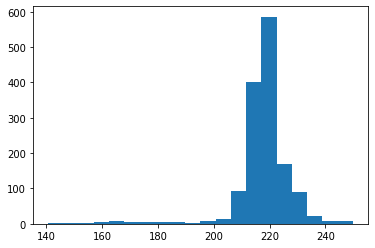

218.53681213890394


In [ ]:
# plot a histogram of the average pixel intensity

import matplotlib.pyplot as plt

# compute the average pixel intensity
average_pixel_intensity = compute_average_pixel_intensity('/content/drive/MyDrive/duplicate_detector/tk_1936')

# plot a histogram
plt.hist(average_pixel_intensity, bins = 100)
plt.show()

print(np.median(average_pixel_intensity))